In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# change the code completely into functions

def feature_scaling(X, method='max'):
    if method == 'max':
        X_scaled = X / X.max(axis=0)
    elif method == 'mean':
        X_scaled = (X - X.mean(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    elif method == 'z-score':
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        raise ValueError(" Use 'max', 'mean', or 'z-score'.")
    return X_scaled

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

In [4]:
# Generate synthetic data with different feature scales
np.random.seed(0)
# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)
# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)
# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))
# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

In [5]:
scaling_methods = ['max', 'mean', 'z-score']

Mean Squared Error (Max Normalization): 2042.0688482379646


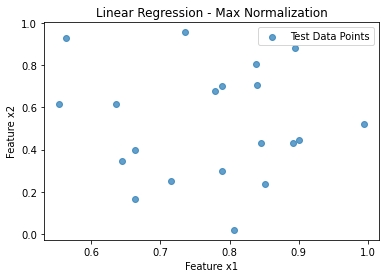

Learned Coefficients (Weights):
[[970.68201825]
 [848.0673906 ]]
Bias (Intercept): 1248.161630212336
Mean Squared Error (Mean Normalization): 17365.373922900733


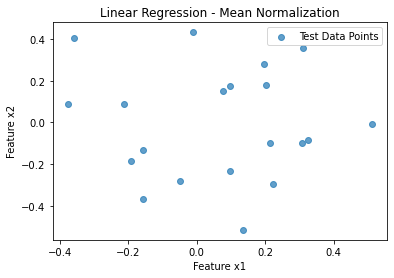

Learned Coefficients (Weights):
[[316.12594094]
 [535.19603576]]
Bias (Intercept): 2407.9552961821387
Mean Squared Error (Z-score Normalization): 0.8110670689820058


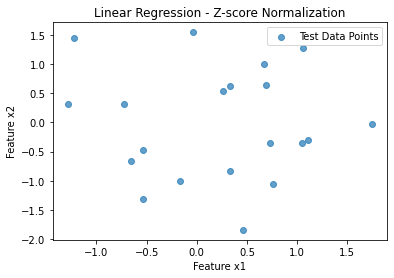

Learned Coefficients (Weights):
[[172.75879895]
 [276.64937111]]
Bias (Intercept): 2411.492747754207


In [6]:
for method in scaling_methods:
    # Scale the features
    X_scaled = feature_scaling(X, method)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, daily_profit, test_size=0.2, random_state=42)

    # linear regression, gradient descent, and evaluation
    n_features = X_train.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    alpha = 0.01 # Learning Rate
    num_iterations = 1000
    m = len(X_train)
    # Compute gradients and Update weights and bias
    for iteration in range(num_iterations):
        y_pred = np.dot(X_train, w) + b
        w_gradient = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
        b_gradient = (1 / m) * np.sum(y_pred - y_train)
        w -= alpha * w_gradient.reshape(-1, 1)
        b -= alpha * b_gradient
    # Make predictions on the test data
    y_pred = np.dot(X_test, w) + b
    mse = mean_squared_error(y_test, y_pred)

    # Print the Mean Squared Error for each scaling method
    print(f"Mean Squared Error ({method.capitalize()} Normalization): {mse}")

    # Plot one feature (e.g., x1) against y_test
    plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data Points', alpha=0.7)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')
    plt.legend()
    plt.title(f'Linear Regression - {method.capitalize()} Normalization')
    plt.show()

    # Print the learned coefficients
    print("Learned Coefficients (Weights):")
    print(w)
    print("Bias (Intercept):", b)